# **Jaini Bhavsar**

**MidTerm Project**

The goal of the project is to correctly identify digits from a dataset of tens of thousands of handwritten images. The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine. The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.








Table of Contents

1. Import Necessary Libraries
2. Defining some useful functions
3. Explore Datasets: Distribution of Labels, Shape of Images
4. Data Preprocessing
5. Modeling: CNN
6. Model Evaluation
7. Submit to Competition

**Deep** **Neural** **Network** **Model** 



*   Convolutional Neural Netwrok


Importing Necessary Packages and Libraries

In [ ]:
# Common Imports - Libraries for Scientific Computations
import pandas as pd
import numpy as np
import os

# To Plot Graphs
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline 

#Keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.models import Sequential

# For Python Programming Language
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split 

# For Numerical Computations
import tensorflow as tf
import keras 

#For Image Augmentation
from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical


Defining some functions for data loading, data splitting and normalizing the data.

In [ ]:
# Splitting the training and validation dataset
def datasplit(x,y):
    x_train, x_val, y_train, y_val = train_test_split(x, y,test_size=.2,random_state=1)
    return(x_train, x_val, y_train, y_val)

# Defining a function for fetching the data
def dataload(filepath): 
    df = pd.read_csv(filepath)
    return df
 
# Defining a function of data preprocessing 
def datapreprocess(df):
    y_transformed = keras.utils.np_utils.to_categorical(df.label, 10)
    num_im = df.shape[0]
    conv2d = df.values[:,1:]
    x_for_cnn = conv2d.reshape(num_im,28,28, 1)
    x_transformed = x_for_cnn / 255
    return x_transformed,y_transformed

**Data Fetching** - Data fetching involves extraction of data from train.csv file.

This step involves reading the csv file.

In [ ]:
# fetching the data
filepath = "/content/train.csv"
df = dataload(filepath)

**Exploring the DataSet**

In [ ]:
# printing shape of the data
print('Shape of the Training Dataset', df.shape)

Shape of the Training Dataset (42000, 785)


In [ ]:
df.tail(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


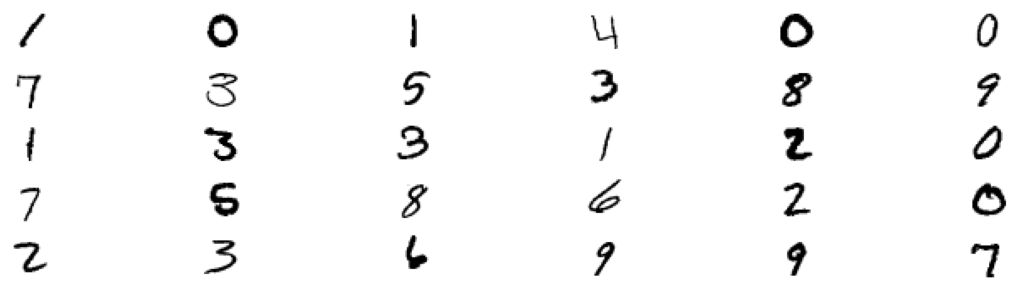

In [ ]:
hand_image = df.drop('label',axis=1).values

# plotting some samples
plt.figure(figsize=(20,5))
for i in range(30):  
    plt.subplot(5, 6, i+1)
    plt.imshow(hand_image[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

This is one of the hand drawn images from the dataset. We can clearly see that some of the digits are twirled. 

In [ ]:
#put labels into y_train variable
y_trained = df["label"]
print(y_trained.shape)


#drop "label" column
x_trained = df.drop(labels = ["label"], axis = 1)

(42000,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

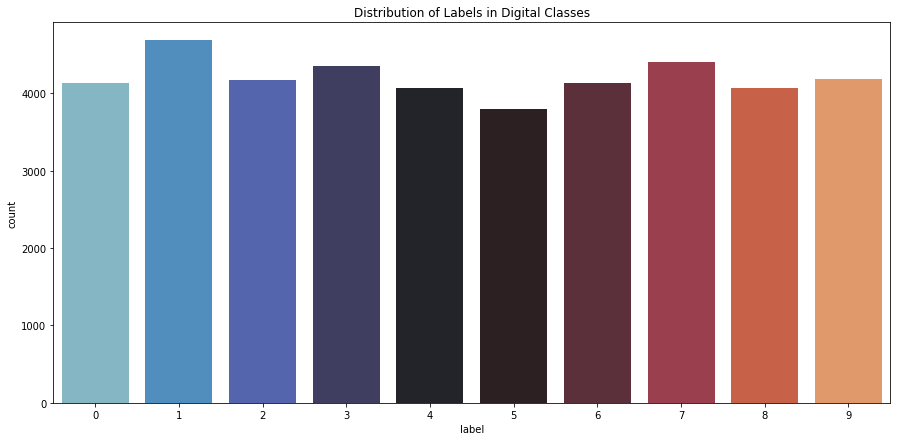

In [ ]:
#visualize number of  digits classes 
plt.figure(figsize=(15,7))
g = sns.countplot(y_trained, palette="icefire")
plt.title("Distribution of Labels in Digital Classes")
y_trained.value_counts()

**Data Preprocessing**

The goal of data preprocessing is to quality check the data, missing data imputation.
Data Preprocessing involves transformation of data to refined format so that it becomes appropriate to train the model.

In [ ]:
x, y = datapreprocess(df)

**Building the Convolutional Neural Network**



*   It is mainly used for image classification and object detection.
*   tf.keras.layers.Conv2D : 2D convolution layer, creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
*   tf.keras.layers.MaxPool2D : Max pooling operation for 2D spatial data.
*   tf.keras.layers.Dropout : Applies Dropout to the input, which is usually used for avoid 'overfitting'.
*   tf.keras.layers.Flatten : Flattens the input. Does not affect the batch size.


In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

**ImageDataGenerator** 

For image augmentation, which is a technique of applying different transformations to 
original images which results in multiple transformed copies of the same image.

There are some operators we need to define. 
*  featurewise_center : Boolean. Set input mean to 0 over the dataset, feature-wise.
* samplewise_center :	Boolean. Set each sample mean to 0.
* featurewise_std_normalization :	Boolean. Divide inputs by std of the dataset, feature-wise.
* samplewise_std_normalization : Boolean. Divide each input by its std.
* zca_whitening :	Boolean. Apply ZCA whitening.
* rotation_range : Int. Degree range for random rotations. value in degrees (0–180) within which to randomly rotate pictures.
* zoom_range : randomly zooming inside pictures
* width_shift, height_shift : ranges within which to randomly translate pictures vertically or horizontally
* horizontal_flip: randomly flipping half of the images horizontally
* vertical_flip: randomly flipping half of the images vertically

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 
print(x.shape)
datagen.fit(x)

(42000, 28, 28, 1)


In [ ]:
x_train, x_val , y_train, y_val = datasplit(x,y)

**Fit the  model**

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
xm = datagen.flow(x,y, batch_size=256)
epochs = 50
batch_size = 256
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs=epochs,validation_data=[x_val,y_val])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


132/132 [==============================] - 19s 74ms/step - loss: 0.9786 - accuracy: 0.6813 - val_loss: 4.1061 - val_accuracy: 0.2385
Epoch 2/50
132/132 [==============================] - 11s 80ms/step - loss: 0.2759 - accuracy: 0.9206 - val_loss: 5.2305 - val_accuracy: 0.2887
Epoch 3/50
132/132 [==============================] - 9s 72ms/step - loss: 0.1926 - accuracy: 0.9465 - val_loss: 3.8791 - val_accuracy: 0.3063
Epoch 4/50
132/132 [==============================] - 12s 88ms/step - loss: 0.1488 - accuracy: 0.9598 - val_loss: 0.5929 - val_accuracy: 0.8283
Epoch 5/50
132/132 [==============================] - 11s 86ms/step - loss: 0.1284 - accuracy: 0.9642 - val_loss: 0.0406 - val_accuracy: 0.9881
Epoch 6/50
132/132 [==============================] - 11s 85ms/step - loss: 0.1066 - accuracy: 0.9707 - val_loss: 0.0587 - val_accuracy: 0.9846
Epoch 7/50
132/132 [==============================] - 12s 88ms/step - loss: 0.1059 - accuracy: 0.9718 - val_loss: 0.0425 - val_accuracy: 0.9881
Epoc

**Saving the Model**

In [ ]:
model.save("Digit_Recognizer_CNNmodel.h5")

**Evaluating the Model**

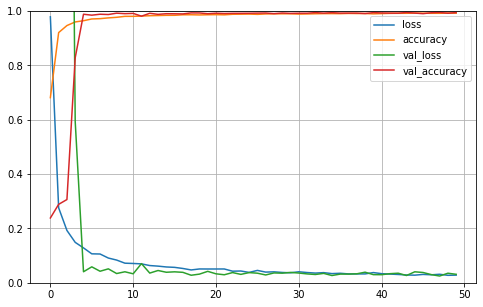

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

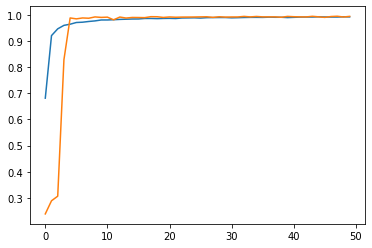

In [ ]:
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

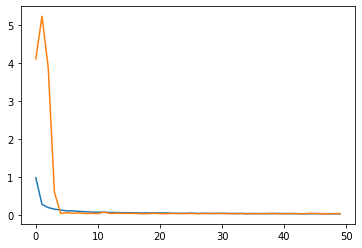

In [ ]:
plt.plot(history.epoch,history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [ ]:
path="/content/test.csv"
data=dataload(path)
image_count= data.shape[0]
x_array = data.values[:,:]
gray_scale = x_array.reshape(image_count,28,28, 1)
x_test = gray_scale / 255

In [ ]:
pred1 = model.predict(x_test)

875/875 [==============================] - 2s 2ms/step


In [ ]:
pred2 = np.argmax(pred1,axis = 1)

In [ ]:
predict = pd.Series(pred2, name="Label")
image_id = pd.Series(np.arange(1,len(predict)+1), name = "ImageId")

In [ ]:
result_file = pd.concat([image_id,predict],axis =1)
result_file.to_csv('submission_file.csv')
result_file.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


**Kaggle rank of the Submission**

## **Top 20% Rank - Jaini Bhavsar**

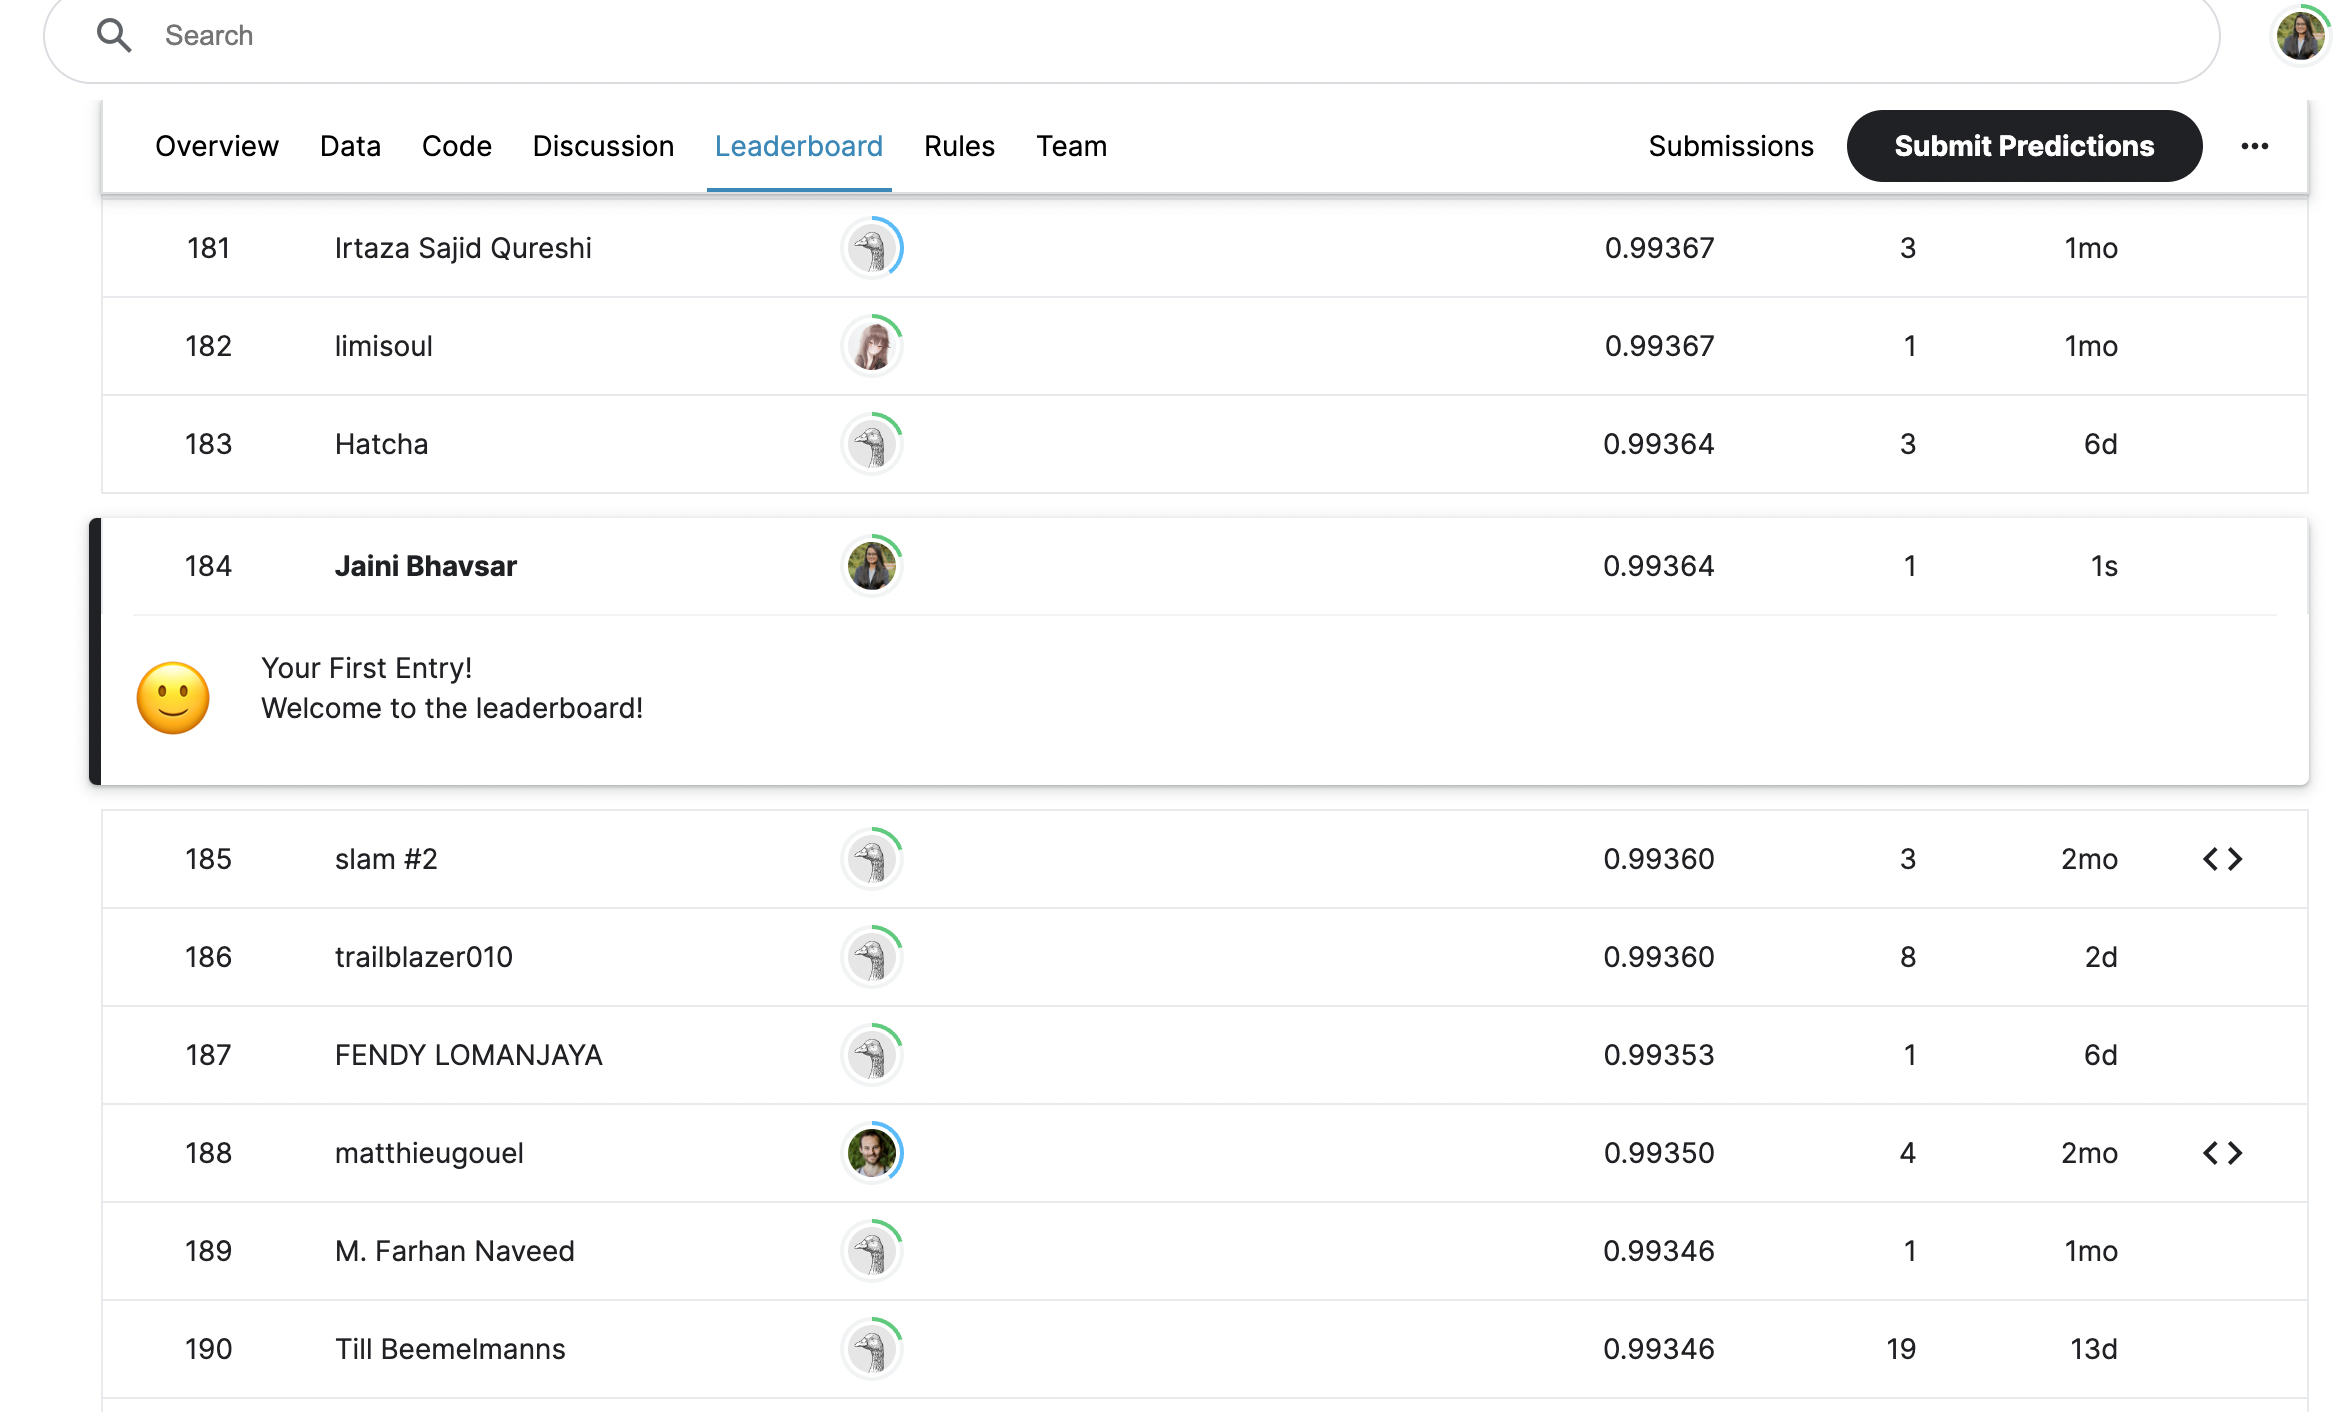